# Ordenamiento

El ordenamiento de arreglos corresponde a encontrar una permutación tal que cada elemento sea menor a su sucesor. 

In [1]:
def selection_sort(collection):
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (collection[i], collection[least])
    return collection

def insertion_sort(collection):
    for index in range(1, len(collection)):
        while 0 < index and collection[index] < collection[index - 1]:
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
    return collection

In [2]:
insertion_sort([3,2,1])

[1, 2, 3]

In [3]:
import numpy as np
import time

def gen_random(size):
    return np.random.permutation(np.arange(size+1,dtype=np.int8))

def gen_worst_case(size):
    return np.arange(size,-1,-1,dtype=np.int8)

def gen_best_case(size):
    return np.arange(size+1,dtype=np.int8)

In [ ]:
gen_random(3)

array([3, 2, 1, 0], dtype=int8)

In [4]:
import numpy as np
import time

arr=gen_best_case(1000)

start=time.time()
insertion_sort(arr.copy())
end=time.time()
t1=end-start

start=time.time()
selection_sort(arr.copy())
end=time.time()
t2=end-start



print('Insertion Sort: %2f'%t1)
print('Selection Sort : %2f'%t2)


Insertion Sort: 0.521328
Selection Sort : 0.240239


In [5]:
def merge_sort(A):
    n=len(A)
    if len(A) <= 1:
      return A
    L = merge_sort(A[0:int(n/2)])
    R = merge_sort(A[int(n/2):n])
    return merge(L, R)

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
      if L[l_idx] < R[r_idx]:
        result.append(L[l_idx])
        l_idx += 1
      else:
        result.append(R[r_idx])
        r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

In [6]:
import pandas as pd
import time 
import sys

time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}
methods=['insertion_sort','selection_sort','merge_sort']
problems=[1e2,2e2,3e2]
sample_size=100

for m in methods:
  for p in problems:
    for i in range(sample_size):
      arr=gen_random(p)
      t1=time.time()
      eval(m)(arr)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [7]:
df=pd.DataFrame(time_data)
df['problem_size']=df['problem_size'].astype('int32')

In [8]:
df.head()

,method,ellapsed_time,problem_size
0,insertion_sort,0.001764,100
1,insertion_sort,0.001865,100
2,insertion_sort,0.001717,100
3,insertion_sort,0.001813,100
4,insertion_sort,0.001924,100


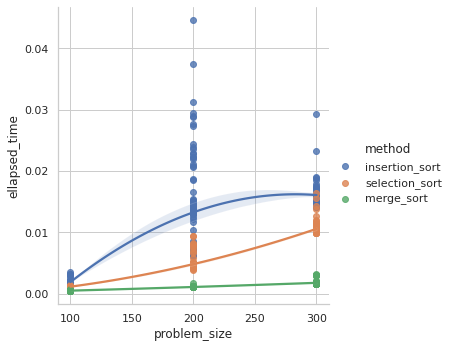

In [9]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="problem_size", y="ellapsed_time", hue="method",order=2, data=df)
plt.show()

In [10]:
df.groupby(['method','problem_size']).mean()


ellapsed_time
method         problem_size               
insertion_sort 100                0.001917
               200                0.013278
               300                0.016086
merge_sort     100                0.000524
               200                0.001122
               300                0.001798
selection_sort 100                0.001172
               200                0.004852
               300                0.010586